# Covid-19

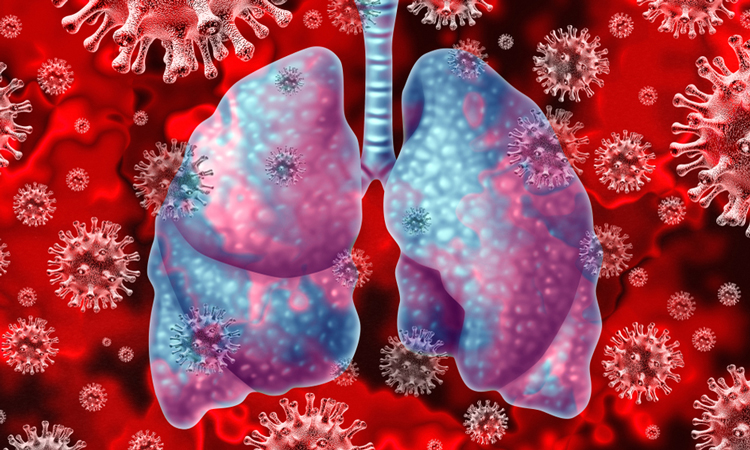

Let's first import the packages necessary for the task and load the dataset. 

In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn .preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot,plot_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D,Dropout,Flatten,Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array


Bad key "text.kerning_factor" on line 4 in
C:\ANACONDA\envs\mlops\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


Setting the image dimensions.

In [2]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
lbls = list(map(str, range(NB_CLASSES)))
EPOCHS = 40
batch_size = 2

In [3]:
DATASET_DIR = "C:/Users/GAURAV's LAPPY/Desktop/COVID_19_CNN_X-ray_predict/dataset/"

Let's have a quick of data.

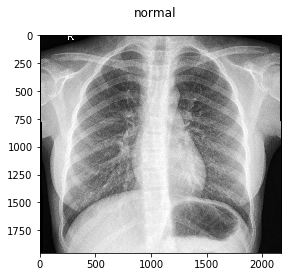

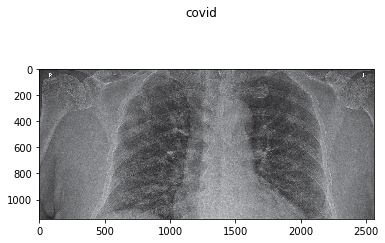

In [4]:

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))
    
fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray')

Now, applying the model.

In [5]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu',
                      input_shape = (IMG_W,IMG_H,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


classifier.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

classifier.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 2, activation = 'softmax'))
classifier.compile(optimizer = Adam(lr=0.001),loss='categorical_crossentropy', metrics = ['accuracy'])


In [6]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [7]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        #featurewise_center=False,  # set input mean to 0 over the dataset
        #samplewise_center=False,  # set each sample mean to 0
        #featurewise_std_normalization=False,  # divide inputs by std of the dataset
        #samplewise_std_normalization=False,  # divide each input by its std
        #zca_whitening=False,  # apply ZCA whitening
        rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        #zoom_range = 0.1, # Randomly zoom image 
        #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        #height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip=True,  # randomly flip images
        #vertical_flip=False,  # randomly flip images
        #preprocessing_function=preprocess_image,
        rescale = 1./255,
        validation_split = 0.3) 
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=4,
    class_mode='categorical',
    subset='training')
validation_generator = datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=4,
    class_mode='categorical',
    shuffle= False,
    subset='validation')

Found 36 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [22]:
es= EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 10)
mc = ModelCheckpoint('cnn_covid_pred.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

In [28]:
history = classifier.fit_generator(train_generator,
                         steps_per_epoch = 12,
                         epochs=40,
                         callbacks = [es, mc],
                         workers=4,
                         validation_data = validation_generator,
                         validation_steps = 10)

Epoch 1/40
12/12 [==============================] - 18s 1s/step - loss: 0.1810 - accuracy: 0.9167 - val_loss: 0.9385 - val_accuracy: 0.5000

Epoch 00001: val_loss did not improve from 0.11651
Epoch 2/40
12/12 [==============================] - 16s 1s/step - loss: 0.0844 - accuracy: 0.9583 - val_loss: 0.3720 - val_accuracy: 0.6471

Epoch 00002: val_loss did not improve from 0.11651
Epoch 3/40
12/12 [==============================] - 18s 1s/step - loss: 0.1303 - accuracy: 0.9375 - val_loss: 0.9729 - val_accuracy: 0.5833

Epoch 00003: val_loss did not improve from 0.11651
Epoch 4/40
12/12 [==============================] - 17s 1s/step - loss: 0.1727 - accuracy: 0.9583 - val_loss: 2.0380 - val_accuracy: 0.6765

Epoch 00004: val_loss did not improve from 0.11651
Epoch 5/40
12/12 [==============================] - 17s 1s/step - loss: 0.2062 - accuracy: 0.9375 - val_loss: 0.2092 - val_accuracy: 0.6667

Epoch 00005: val_loss did not improve from 0.11651
Epoch 6/40
12/12 [======================

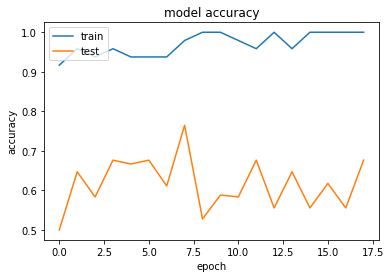

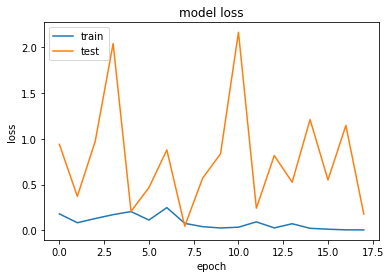

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 1.0
validation_accuracy 0.6764705777168274


In [31]:
print("training_loss", history.history['loss'][-1])
print("validation_loss", history.history['val_loss'][-1])

training_loss 0.0062740233383919985
validation_loss 0.17952114343643188


In [32]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [8]:
#Load model
from keras.models import load_model

classifier = load_model('cnn_covid.h5')

# predict from training and testing dataset

In [16]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

predction = {"[0]": "covid ", 
             "[1]": "normal",
            }

predction_n = {"covid": "COVID ", 
                "normal": "NORMAL",
               }

def draw_test(name, pred, im):
    result = predction[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, result, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + predction_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,10):
    input_im = getRandomImage("C:/Users/GAURAV's LAPPY/Desktop/COVID_19_CNN_X-ray_predict/dataset/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (150, 150), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,150,150,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

Class - COVID 
Class - NORMAL
Class - NORMAL
Class - COVID 
Class - COVID 
Class - COVID 
Class - COVID 
Class - NORMAL
Class - COVID 
Class - NORMAL


# predict from random dataset

In [17]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

predction = {"[0]": "covid ", 
             "[1]": "normal",
            }

predction_n = {"covid": "COVID ", 
                "normal": "NORMAL",
               }

def draw_test(name, pred, im):
    result = predction[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, result, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + predction_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,10):
    input_im = getRandomImage("C:/Users/GAURAV's LAPPY/Desktop/COVID_19_CNN_X-ray_predict/random/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (150, 150), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,150,150,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

Class - NORMAL
Class - NORMAL
Class - NORMAL
Class - NORMAL
Class - NORMAL
Class - COVID 
Class - NORMAL
Class - COVID 
Class - NORMAL
Class - NORMAL
